[-0.3031323952381563, -0.1964410468213601]
[ 0.479583 -0.15     -0.1     ]
[ 0.479583 -0.15     -0.1     ]
[ 0.479583 -0.15     -0.1     ]
[ 0.479583 -0.15     -0.1     ]
[ 0.479583 -0.15     -0.1     ]
[ 0.479583 -0.15     -0.1     ]
[ 0.479583 -0.15     -0.1     ]
Only change the cluster seperation by 2 times
XYZ String:
H 0.02041700000000002 0.15000000000000002 0.1;
        H 0.979583 -0.15000000000000002 -0.1;
        H 0.2000000001157215 1.599999999747428 0.1;
        H 1.1591660001157216 1.2999999997474276 -0.1;
        H 0.5591660003471645 4.499999999242284 0.1;
        H 1.5183320003471645 4.199999999242284 -0.1;
        H 0.7387490004628859 5.949999998989711 0.1;
        H 1.6979150004628858 5.649999998989711 -0.1;
        H 1.097915000694329 8.849999998484568 0.1;
        H 2.0570810006943288 8.549999998484568 -0.1;
        H 1.2774980008100503 10.299999998231996 0.1;
        H 2.2366640008100505 9.999999998231996 -0.1;
        


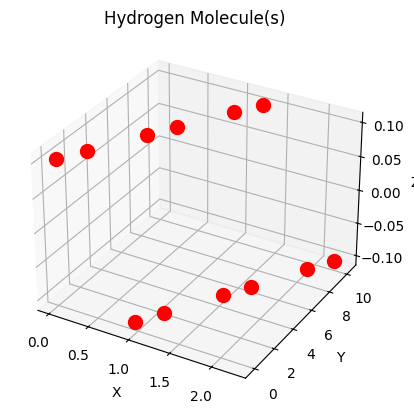

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Function to convert spherical to Cartesian coordinates
def sph2cart(az, el, r=0.5123473957082245):
    rcos_theta = r * np.cos(el)
    x = rcos_theta * np.cos(az)
    y = rcos_theta * np.sin(az)
    z = r * np.sin(el)
    return x, y, z

# Function to generate the hydrogen molecule geometry in XYZ string format
def get_geom_many_h(dist=0.0, angles=[-0.3031323952381563, -0.1964410468213601], n_dimers=2, uniform=False, clusterOnly=False):
    print(angles)
    disp = np.array(sph2cart(angles[0], angles[1]))
    print(disp)
    xyzs = []
    for i in range(n_dimers):
        mid = np.array([0.12291127, 0.992417664, 0.0]) * (i + i // 2) * (1.461078387 + dist * 0.5)
        if uniform:
            mid = np.array([0.12291127, 0.992417664, 0.0]) * i * (1.461078387 + dist * 0.5)
        if clusterOnly:
            mid = np.array([0.12291127, 0.992417664, 0.0]) * (i + i // 2 * dist) * (1.461078387)
        mid[0] += 0.5
        print(disp)
        h3 = mid - disp
        h4 = mid + disp

        # Format as XYZ string for each dimer
        xyz = """H {} {} {};
        H {} {} {};
        """.format(h3[0], h3[1], h3[2], h4[0], h4[1], h4[2])
        xyzs.append(xyz)
    
    # Combine all the dimers into one XYZ string
    xyz = xyzs[0]
    for i in range(1, n_dimers):
        xyz += xyzs[i]
    if clusterOnly:
        print(f"Only change the cluster seperation by {1+dist} times")
    return xyz

# Function to parse the XYZ string into numerical coordinates
def parse_xyz_string(xyz_string):
    coords = []
    lines = xyz_string.strip().split('\n')
    for line in lines:
        parts = line.split()
        if len(parts) == 4:  # Ensure it's in the form 'H x y z'
            # Remove the semicolon and convert to float
            x, y, z = float(parts[1].strip(';')), float(parts[2].strip(';')), float(parts[3].strip(';'))
            coords.append([x, y, z])
    return np.array(coords)

# Function to plot the molecule in 3D
def plot_molecule(coords):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    
    # Plot each atom as a point
    for atom in coords:
        ax.scatter(atom[0], atom[1], atom[2], color='r', s=100)
    
    # Adding labels and setting the aspect
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title('Hydrogen Molecule(s)')

    plt.show()

# Generate XYZ string for the molecule
dist = 1
xyz_string = get_geom_many_h(dist=dist, n_dimers=6, clusterOnly=True)
print("XYZ String:")
print(xyz_string)
# Parse the XYZ string to numerical coordinates for plotting
coords = parse_xyz_string(xyz_string)

# Plot the molecule
plot_molecule(coords)

# Print the XYZ string output



[-0.3031323952381563, -0.1964410468213601]
[ 0.479583 -0.15     -0.1     ]
[ 0.479583 -0.15     -0.1     ]
[ 0.479583 -0.15     -0.1     ]
[ 0.479583 -0.15     -0.1     ]
[ 0.479583 -0.15     -0.1     ]
[ 0.479583 -0.15     -0.1     ]
[ 0.479583 -0.15     -0.1     ]
XYZ String:
H 0.02041700000000002 0.15000000000000002 0.1;
        H 0.979583 -0.15000000000000002 -0.1;
        H 0.29218345261572154 2.3443132477474276 0.1;
        H 1.2513494526157216 2.0443132477474277 -0.1;
        H 0.8357163578471644 6.732939743242283 0.1;
        H 1.7948823578471642 6.432939743242282 -0.1;
        H 1.1074828104628858 8.927252990989711 0.1;
        H 2.066648810462886 8.62725299098971 -0.1;
        H 1.6510157156943288 13.315879486484565 0.1;
        H 2.6101817156943286 13.015879486484565 -0.1;
        H 1.92278216831005 15.510192734231994 0.1;
        H 2.88194816831005 15.210192734231994 -0.1;
        


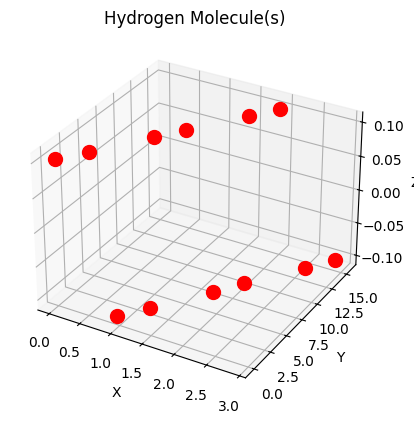

In [8]:
# Generate XYZ string for the molecule
dist = 1.5
xyz_string = get_geom_many_h(dist=dist, n_dimers=6)
print("XYZ String:")
print(xyz_string)
# Parse the XYZ string to numerical coordinates for plotting
coords = parse_xyz_string(xyz_string)

# Plot the molecule
plot_molecule(coords)

# Print the XYZ string output



In [ ]:
def get_geom_many_h(dist=0.0, angles=[-0.3031323952381563, -0.1964410468213601], n_dimers=2, uniform=False, clusterOnly=False):
    disp = np.array(sph2cart(angles[0], angles[1]))

    xyzs = []
    for i in range(n_dimers):
        mid = np.array([0.12291127, 0.992417664, 0.0]) * (i + i // 2) * (1.461078387 + dist * 0.5)
        if uniform:
            mid = np.array([0.12291127, 0.992417664, 0.0]) * i * (1.461078387 + dist * 0.5)
        if clusterOnly:
            mid = np.array([0.12291127, 0.992417664, 0.0]) * (i + i // 2 * dist) * (1.461078387)
            print(mid)
        mid[0] += 0.5
        print(mid)
        h3 = mid - disp
        h4 = mid + disp

        # Format as XYZ string for each dimer
        xyz = """H {} {} {};
        H {} {} {};
        """.format(h3[0], h3[1], h3[2], h4[0], h4[1], h4[2])
        xyzs.append(xyz)
    
    # Combine all the dimers into one XYZ string
    xyz = xyzs[0]
    for i in range(1, n_dimers):
        xyz += xyzs[i]
    if clusterOnly:
        print(f"Only change the cluster seperation by {1+dist} times")
    return xyz